In [1]:
import simulator as sm
import illustris_python as il
import os
from tqdm import tqdm
import h5py
import numpy as np
import subprocess
import main as mn

In [40]:
def image_from_cube(cube):
    return np.sum(cube[0], axis=0)

def plot_images(clean, dirty, tclean, prediction, fsize=20):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['axes.labelsize'] = fsize
    mpl.rcParams['axes.titlesize'] = fsize
    mpl.rcParams['xtick.labelsize'] = fsize
    mpl.rcParams['ytick.labelsize'] = fsize
    mpl.rcParams['legend.fontsize'] = fsize
    fig, ax = plt.subplots(1, 4, figsize=(26, 5))
    ax[0].imshow(clean, origin='lower')
    ax[1].imshow(dirty, origin='lower')
    ax[2].imshow(tclean, origin='lower')
    ax[3].imshow(prediction, origin='lower')
    #plt.colorbar(ax[0].imshow(clean, origin='lower'), ax=ax[0], label='Jy/px')
    #plt.colorbar(ax[1].imshow(dirty, origin='lower'), ax=ax[1], label='Jy/px')
    #plt.colorbar(ax[2].imshow(tclean, origin='lower'), ax=ax[2], label='Jy/px')
    #plt.colorbar(ax[3].imshow(clean, origin='lower'), ax=ax[3], label='Jy/px')
    ax[0].set_title('Sky Model Image')
    ax[1].set_title('Observed Image')
    ax[2].set_title('CLEANed Image')
    ax[3].set_title('DF Predicted Image')
    ax[0].set_xlabel('x [pixels]')
    ax[0].set_ylabel('y [pixels]')
    ax[1].set_xlabel('x [pixels]')
    ax[1].set_ylabel('y [pixels]')
    ax[2].set_xlabel('x [pixels]')
    ax[2].set_ylabel('y [pixels]')
    ax[3].set_xlabel('x [pixels]')
    ax[3].set_ylabel('y [pixels]')
    plt.show()

(1, 128, 256, 256) (1, 128, 256, 256)
240711.47 240710.97
240711.17 240710.97 256718.58


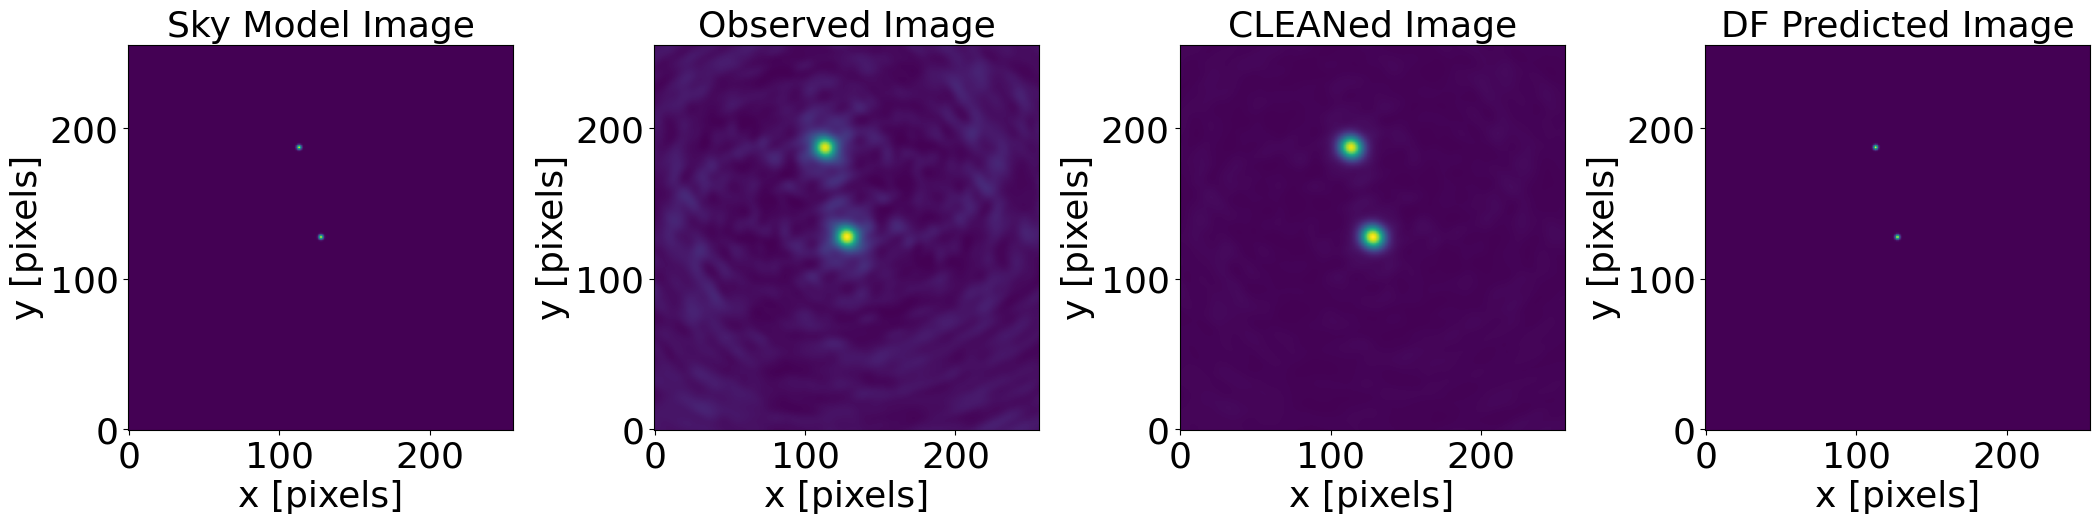

In [41]:
data_path = '/home/michele/casa-data/gaussian-simulations-6'
output_path = '/home/michele/casa-data/gaussian-simulations-6/output'
i = 3
dirty, _ = sm.load_fits(data_path + '/dirty_cube_{}.fits'.format(i))
clean, _ = sm.load_fits(data_path + '/clean_cube_{}.fits'.format(i))
tclean, _ = sm.load_fits(data_path + '/tclean_cube_{}.fits'.format(i))
prediction, _ = sm.load_fits(output_path + '/prediction_cube_{}.fits'.format(i))
print(dirty.shape, clean.shape)
print(np.sum(clean), np.sum(dirty))
clean_image = image_from_cube(clean)
dirty_image = image_from_cube(dirty)
tclean_image = image_from_cube(tclean)
prediction_image = image_from_cube(prediction)
plot_images(clean_image, dirty_image, tclean_image, prediction_image, fsize=26)
